In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import ks_2samp
diamonds_train = pd.read_csv('diamonds_train.csv')
diamonds_test = pd.read_csv('diamonds_test.csv')
diamonds_val = pd.read_csv('diamonds_val.csv')

In [ ]:
def get_data(split: str):
    df = pd.read_csv(f'diamonds_{split}.csv')
    df = df.rename(columns = {'Unnamed: 0': 'Index'})
    # print(df.dtypes)
    x = df.drop(['Index', 'price'], axis = 1) # index col not needed
    # print(x.describe())
    y = df['price']
    # print(y.describe())
    # x_arr = x.to_numpy()
    # y_arr = y.to_numpy()
    # # print(x_arr[1])
    # print(y_arr[0])
    return x, y

In [ ]:
def ohe(df, col: str):
  visited = []
  for val in df[col]:
    if val not in visited:
      visited.append(val)
  for val in visited:
    if f'{val}_{col}' not in df.columns:
      df[f'{val}_{col}'] = df[col].apply(lambda x: 1 if x == val else 0)

  df = df.drop(col, axis = 1)
  return df

In [ ]:
def feature_engineering(split):
  x_train, y_train = get_data('train')
  x_train = ohe(x_train, 'color')
  x_train = ohe(x_train, 'cut')
  x_train = ohe(x_train, 'clarity')
  ks= {}
  if split != "train":


    x_split, y_split = get_data(split)
    x_split = ohe(x_split, 'color')
    x_split = ohe(x_split, 'cut')
    x_split = ohe(x_split, 'clarity')
    train = pd.concat([x_train, y_train], axis = 1)
    val = pd.concat([x_split, y_split], axis = 1)
    for col in train.columns:
      stat, p = ks_2samp(train[col], val[col])
      ks[col] = f'statistic: {stat}', f'p-value: {p}'
  else:
    x_split, y_split = x_train, y_train

  for k, v in ks.items():
    _, p = v
    p = float(p.split(': ')[1])
    if p < 0.05:
      print('different distributions')
      raise Exception

  print('p looks good')
  scaler = StandardScaler()
  scaler.fit(y_train.to_numpy().reshape(-1, 1))
  y_split = scaler.transform(y_split.to_numpy().reshape(-1, 1))
  n_feats = x_split.shape[1]
  # print(n_feats)
  x_split = x_split.to_numpy()
  return x_split, y_split, n_feats, ks

# change param to use train as a basis for fit


In [ ]:
# Separate features and target
x_train, y_train, _, _ = feature_engineering('train')
x_test, y_test, _, _ = feature_engineering('test')
x_val, y_val, _, _ = feature_engineering('val')


p looks good
p looks good
p looks good


In [ ]:
model = DecisionTreeRegressor(random_state=83)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=83)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x_val)
mse = mean_squared_error(y_val, predictions)
print(f"Validation MSE: {mse:.4f}")

r2 = r2_score(y_val, predictions)
print(f'R-squared: {r2}')

Validation MSE: 0.2776
R-squared: 0.7349628167417556


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f"Test MSE: {mse:.4f}")

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Test MSE: 0.3244
R-squared: 0.6893408069466862


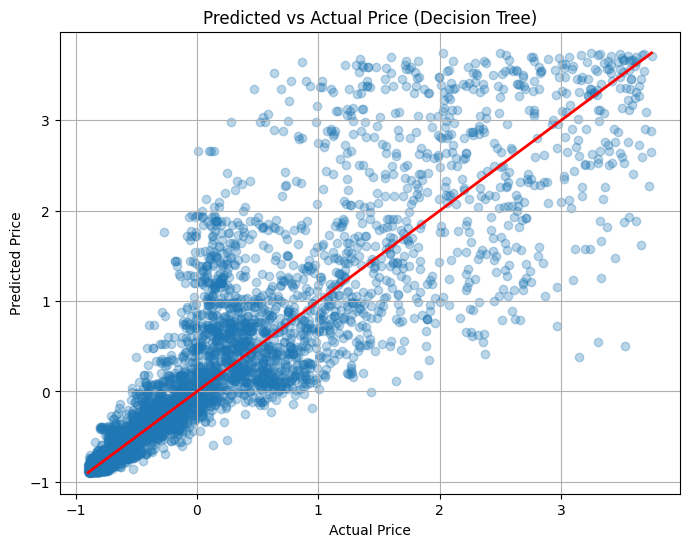

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_val, predictions, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price (Decision Tree)")
plt.grid(True)
plt.show()

In [ ]:
max_reg = None
max_score = 0
t=()
for m in range(2, 6) :
    rf_reg = DecisionTreeRegressor(max_depth=m)
    rf_reg = rf_reg.fit(x_train, y_train)
    rf_reg_score = rf_reg.score(x_val,y_val)
    print (m, rf_reg_score ,max_score)
    if rf_reg_score > max_score :
        max_score = rf_reg_score
        max_reg = rf_reg
        t = (m,max_score)
print (t)

2 0.8335761242140364 0
3 0.8530837900189425 0.8335761242140364
4 0.8260327370258018 0.8530837900189425
5 0.8280115787337469 0.8530837900189425
(3, 0.8530837900189425)


In [ ]:
print(x_val.shape)

(5394, 26)


In [ ]:
X_train = diamonds_train.drop(columns='price')

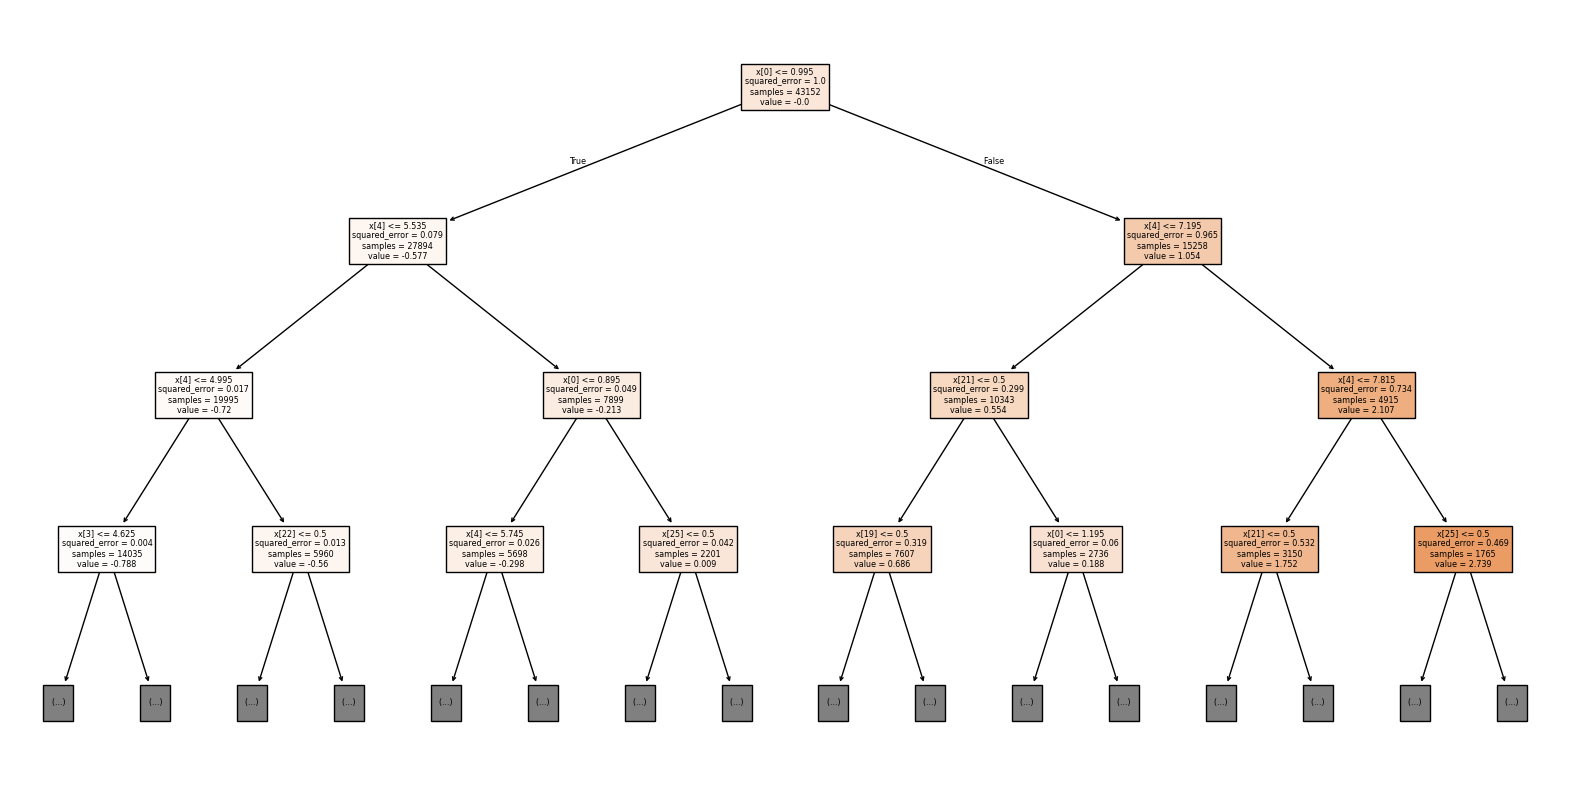

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, max_depth=3)
plt.show()
